In [5]:
import scipy.linalg as la
from math_functions.Get_state_index import Get_State_index
from main_grape.Grape import Grape
%pylab inline
import random as rd
import time
from qutip.qip.algorithms import qft
from IPython import display


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
def qft(N):

    phase = 2.0j * np.pi / (2**N)
    L, M = np.meshgrid(np.arange(2**N), np.arange(2**N))
    L = np.exp(phase * (L * M))
    
    return 1.0 / np.sqrt(2**N) * L

#Defining time scales
total_time = 3.0
steps = 150



       

#Defining Forbidden sates

#states_forbidden_list = []

#Defining Concerned states (starting states)
psi0 = [0,1,2,3]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2,3]
states_draw_names = ['00','01','10','11']

#Defining U (Target)

U= qft(2)
#U = np.diag(np.arange(0,4))

#Defining U0 (Initial)
qq_identity = np.identity(4)
U0= qq_identity

#Defining control Hs
Q_x   = np.diag(np.sqrt(np.arange(1,2)),1)+np.diag(np.sqrt(np.arange(1,2)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,2)),1)-np.diag(np.sqrt(np.arange(1,2)),-1))
Q_z   = np.diag(np.arange(0,2))
Q_I = np.identity(2)

Q_xx = np.kron(Q_x,Q_x)
Q_yy = np.kron(Q_y,Q_y)
Q_zz = np.kron(Q_z,Q_z)
Q_x1 = np.kron(Q_x,Q_I)
Q_y1 = np.kron(Q_y,Q_I)
Q_z1 = np.kron(Q_z,Q_I)
Q_x2 = np.kron(Q_I,Q_x)
Q_y2 = np.kron(Q_I,Q_y)
Q_z2 = np.kron(Q_I,Q_z)

H0 = 0.5* (Q_xx+Q_yy+Q_zz)
Hops = [Q_x1,Q_y1,Q_x2,Q_y2]
ops_max_amp = [4.0,4.0, 4.0, 4.0]
Hnames =['x1','y1', 'x2','y2']

#Defining convergence parameters
max_iterations = 500
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':50, 'max_iterations':max_iterations,\
               'conv_target':1e-8,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0, 'z':0, 'dwdt':0,'d2wdt2':0, 'inter':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}
print U


[[  5.00000000e-01 +0.00000000e+00j   5.00000000e-01 +0.00000000e+00j
    5.00000000e-01 +0.00000000e+00j   5.00000000e-01 +0.00000000e+00j]
 [  5.00000000e-01 +0.00000000e+00j   3.06161700e-17 +5.00000000e-01j
   -5.00000000e-01 +6.12323400e-17j  -9.18485099e-17 -5.00000000e-01j]
 [  5.00000000e-01 +0.00000000e+00j  -5.00000000e-01 +6.12323400e-17j
    5.00000000e-01 -1.22464680e-16j  -5.00000000e-01 +1.83697020e-16j]
 [  5.00000000e-01 +0.00000000e+00j  -9.18485099e-17 -5.00000000e-01j
   -5.00000000e-01 +1.83697020e-16j   2.75545530e-16 +5.00000000e-01j]]


(array([[-1.13407528, -1.12306821, -1.10270238, -1.07303214, -1.03463101,
         -0.9886061 , -0.93551505, -0.8764562 , -0.81216568, -0.74354577,
         -0.67144662, -0.59674203, -0.52009898, -0.44247878, -0.36428156,
         -0.28625616, -0.20922975, -0.13320853, -0.05907345,  0.01283341,
          0.08270633,  0.14981677,  0.21400422,  0.27553725,  0.33398375,
          0.38976529,  0.44232669,  0.49233145,  0.53965276,  0.58443606,
          0.62710035,  0.66761315,  0.70639706,  0.7435683 ,  0.77946424,
          0.81430298,  0.84833664,  0.8817814 ,  0.91489398,  0.94792092,
          0.98094201,  1.01414931,  1.0477829 ,  1.08175814,  1.11616945,
          1.15109861,  1.18627858,  1.2219131 ,  1.25753272,  1.29304767,
          1.32824028,  1.36252832,  1.39605153,  1.42773187,  1.45799351,
          1.48546302,  1.51009941,  1.53120232,  1.54836011,  1.56092381,
          1.56895447,  1.57133198,  1.56841731,  1.55989063,  1.54513574,
          1.52451456,  1.49818206,  1.

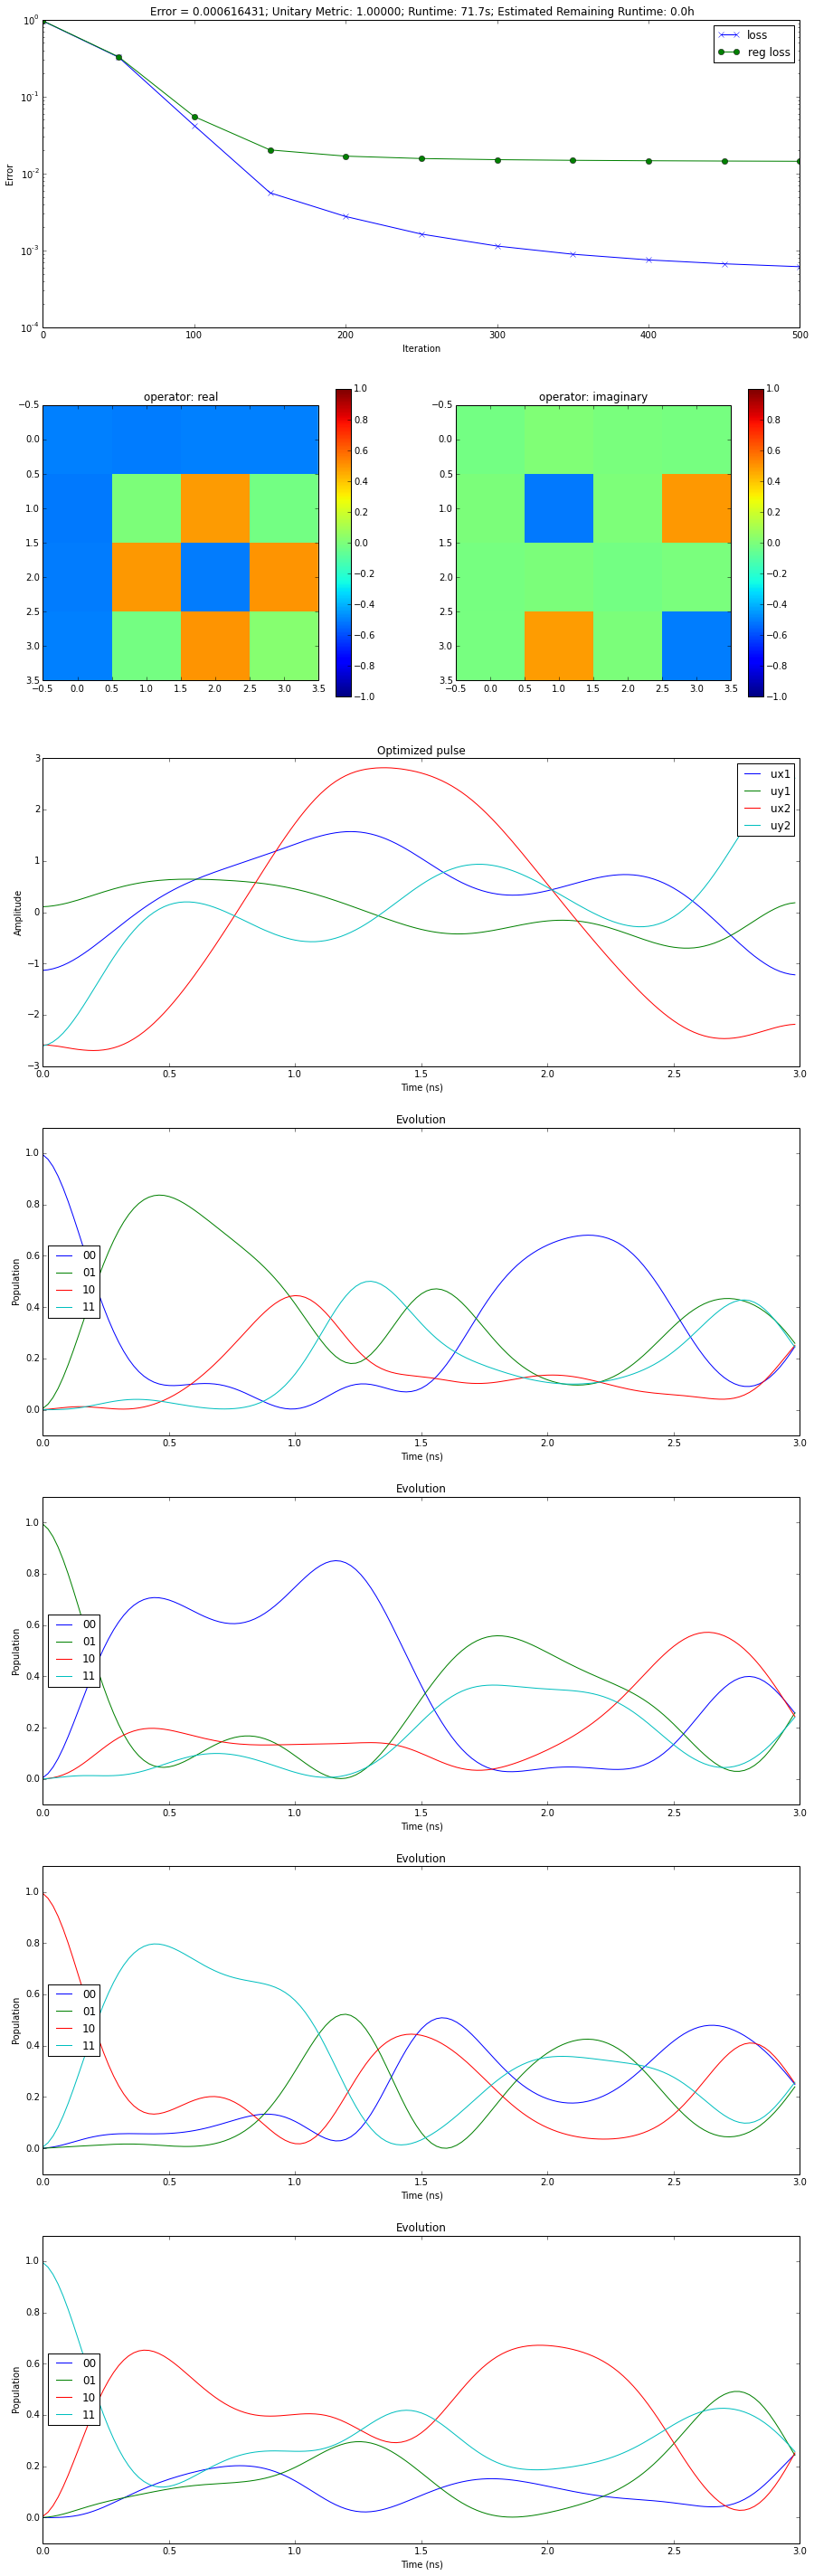

In [9]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence, draw = [states_draw_list,states_draw_names], show_plots = True)